## Convolutional Neural Network

### Classifier to detect Cats and Dogs

In [1]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 

/home/vesper/anaconda3/envs/aml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load datset

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_images = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_images = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Build Classifier

In [3]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Train classifier

In [4]:
classifier.fit_generator(train_images,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_images,
                         validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 622s - loss: 0.3675 - acc: 0.8284 - val_loss: 0.4766 - val_acc: 0.8282
Epoch 2/25
8000/8000 [==============================] - 623s - loss: 0.1345 - acc: 0.9471 - val_loss: 0.7379 - val_acc: 0.8139
Epoch 3/25
8000/8000 [==============================] - 623s - loss: 0.0723 - acc: 0.9737 - val_loss: 0.8557 - val_acc: 0.8056
Epoch 4/25
8000/8000 [==============================] - 622s - loss: 0.0532 - acc: 0.9808 - val_loss: 0.9501 - val_acc: 0.8129
Epoch 5/25
8000/8000 [==============================] - 624s - loss: 0.0427 - acc: 0.9852 - val_loss: 1.0753 - val_acc: 0.8152
Epoch 6/25
8000/8000 [==============================] - 633s - loss: 0.0352 - acc: 0.9880 - val_loss: 1.0560 - val_acc: 0.8120
Epoch 7/25
8000/8000 [==============================] - 621s - loss: 0.0323 - acc: 0.9889 - val_loss: 1.1648 - val_acc: 0.8170
Epoch 8/25
8000/8000 [==============================] - 614s - loss: 0.0280 - acc: 0.9907 - val_loss: 1.2067 - 

### Predict on new Image

## Save Model

In [8]:
from keras.models import load_model

classifier.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del classifier  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_images.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [15]:
test_image.shape

(1, 64, 64, 3)

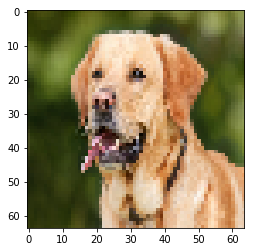

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
plt.imshow(test_image)
plt.show()

In [13]:
prediction

'dog'